# Automating Report Genaration with Pandas

Report showing the Annual profit for each product

In [1]:
import pandas as pd

In [2]:
toys_url = "https://raw.githubusercontent.com/asarfraaz/PyPractice/master/data/toys.csv"

# Load the dataset 

In [3]:
df_toys = pd.read_csv(toys_url)

In [4]:
df_pvt = df_toys.pivot_table(index="Product",
                    aggfunc='sum',
                   )

df_pvt

,Expenditure,Revenue
Product,,
Board,1442078,1604675
Legos,1371631,1531119
Outdoor,1219133,1324561
Puzzles,676850,738423
Wooden,1022994,1072869


In [5]:
cols = df_toys.columns[1:] 

In [6]:
df_pvt = df_toys[cols].pivot_table(index="Product",
                         aggfunc='sum',
                         )

## Digression

## Calculate the Annual Profit for each product

In [7]:
df_pvt.loc[:, 'Profit'] = df_pvt.Revenue - df_pvt.Expenditure
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442078,1604675,162597
Legos,1371631,1531119,159488
Outdoor,1219133,1324561,105428
Puzzles,676850,738423,61573
Wooden,1022994,1072869,49875


In [8]:
import seaborn as sns

## Save the plot for Annual profit in a file

- Add a title to the image

In [9]:
import matplotlib.pyplot as plt

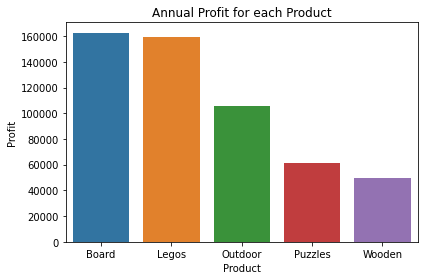

In [10]:
ax = sns.barplot(data = df_pvt.reset_index(),
             y = 'Profit',
             x = 'Product',
            )
plt.title('Annual Profit for each Product');
plt.tight_layout()
plt.savefig('annual_profit.jpg')

## Save the Annual Revenue Report in excel file

- The columns should be in the following order
    - Revenue
    - Expenditure
    - Profit
- Also include the image in it





In [11]:
cols = df_pvt.columns.to_list()

In [12]:
cols

['Expenditure', 'Revenue', 'Profit']

In [13]:
# Prefer to do this, instead of writing the names of columns
new_cols = [ cols[1], cols[0], cols[-1] ]
new_cols

['Revenue', 'Expenditure', 'Profit']

In [14]:
df_pvt[new_cols]

,Revenue,Expenditure,Profit
Product,,,
Board,1604675,1442078,162597
Legos,1531119,1371631,159488
Outdoor,1324561,1219133,105428
Puzzles,738423,676850,61573
Wooden,1072869,1022994,49875


In [15]:
excel_filename = "Annual_Report.xlsx"
year = "2014"


In [16]:
# Only for storing DataFrame in an excel file
# df_pvt[new_cols].to_excel(excel_filename)

In [17]:
# Storing DataFrame and a plot in excel file

from io import BytesIO

imgdata = BytesIO()
ax.figure.savefig(imgdata)

In [18]:
with pd.ExcelWriter(excel_filename, engine='xlsxwriter') as FH:
    df_pvt.to_excel(FH, sheet_name=year)
    shobj = FH.sheets[year]
    shobj.insert_image('E4', '', {'image_data': imgdata})